In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('final_pre-processed_input.csv',sep=';',index_col=0)
df.head()

,accommodation_id,basename,at,description,value_type_id,amenities_id,amenities_cont,label,sorted_amenities_id,a1,a2,a3,a4,a5,a6,a7
0,5088,Hotel Sonne,2,"Set in a prime location of Waldbronn, Hotel So...",1,[47],[1],0.0,"[0, 0, 0, 47, 0, 0, 0]",0,0,0,47,0,0,0
1,5092,Steuermann,2,Ideally located in the prime touristic area of...,1,"[63, 47]","[1, 1]",0.0,"[0, 0, 0, 47, 0, 63, 0]",0,0,0,47,0,63,0
2,5323,Hotel Montree,2,Hotel Montree is conveniently located in the p...,1,"[63, 48]","[1, 1]",0.0,"[0, 0, 0, 0, 48, 63, 0]",0,0,0,0,48,63,0
3,5434,Weidenhof,2,The Weidenhof is a well-situated Hotel in Rege...,1,[48],[1],0.0,"[0, 0, 0, 0, 48, 0, 0]",0,0,0,0,48,0,0
4,5668,East-Side,3,This guest house is located in Berlin’s trendy...,1,[255],[1],0.0,"[0, 0, 0, 0, 0, 0, 255]",0,0,0,0,0,0,255


C:\Users\Barshana\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KERNEL:  linear
[[1417  124]
 [  93  166]]


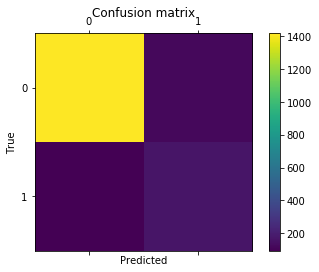

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1541
         1.0       0.57      0.64      0.60       259

   micro avg       0.88      0.88      0.88      1800
   macro avg       0.76      0.78      0.77      1800
weighted avg       0.89      0.88      0.88      1800



C:\Users\Barshana\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Barshana\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KERNEL:  rbf
[[1441  100]
 [ 113  146]]


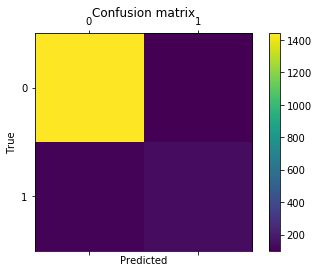

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1541
         1.0       0.59      0.56      0.58       259

   micro avg       0.88      0.88      0.88      1800
   macro avg       0.76      0.75      0.75      1800
weighted avg       0.88      0.88      0.88      1800



In [12]:
X = df[ ['a1','a2','a3','a4','a5','a6','a7']].values
Y = df[['label']].values
labels = [0,1]
X_train , X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)
for kernel in ('linear','rbf'):
    clf = svm.SVC(C=1.0, kernel=kernel).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("KERNEL: ", kernel)
    #print("Accuracy :",kernel ,metrics.accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred,labels)
    print(confusion_matrix(y_test,y_pred,labels))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print(classification_report(y_test,y_pred))